### Importing packages

In [123]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec

### Loading data

In [124]:
df = pd.read_csv('C:/Users/anahi/Downloads/weather-check.csv')

### Renaming

In [125]:
question_var = 'If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?'
age_var = 'Age'

### Data Cleaning

In [126]:
df[age_var] = df[age_var].str.strip().replace('-', np.nan)
df[question_var] = df[question_var].str.strip().replace('-', np.nan)
df.dropna(subset=[age_var, question_var], inplace=True)

### Code

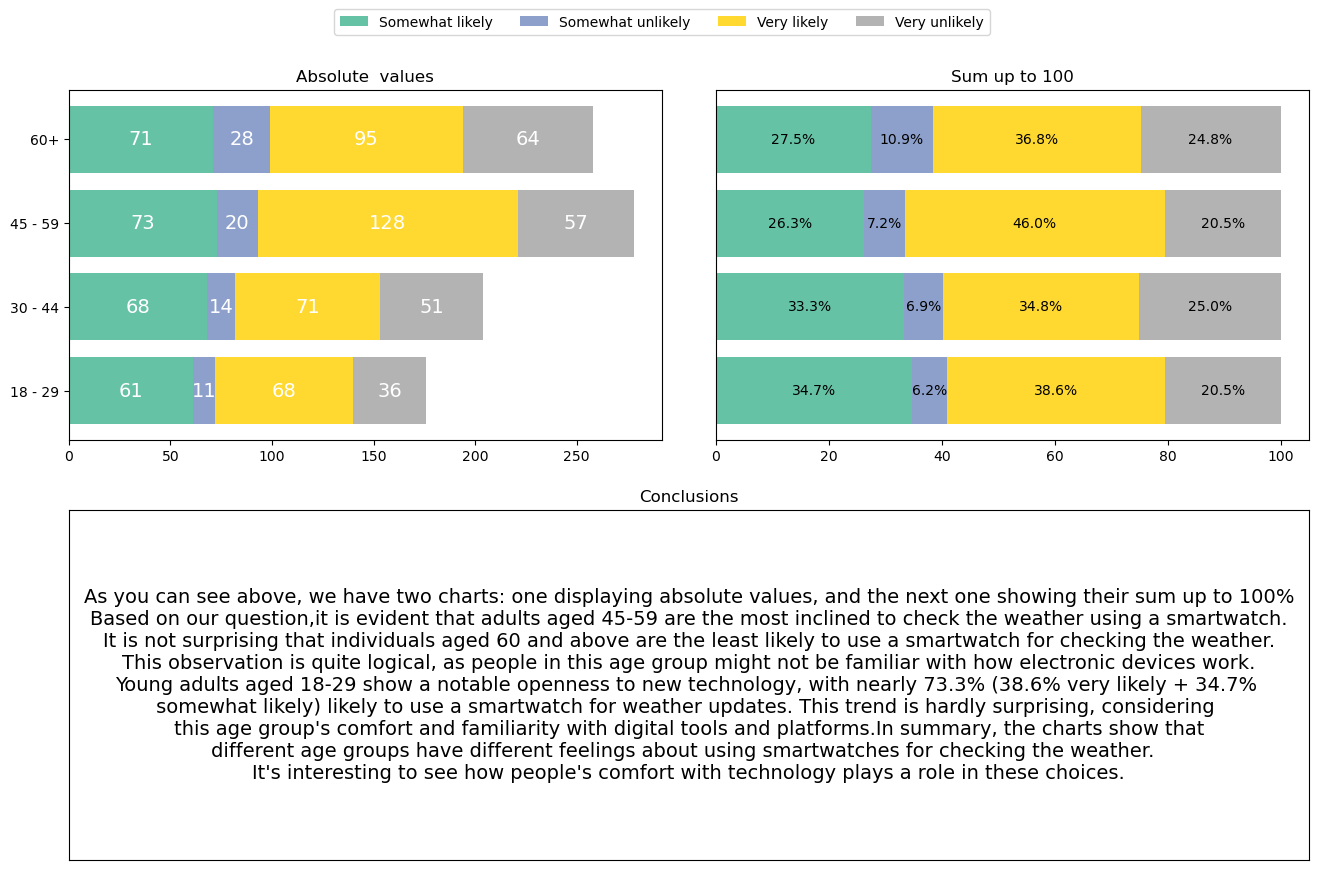

In [128]:
fig = plt.figure(figsize=(16, 10))
gs = gridspec.GridSpec(2, 4, width_ratios=[2, 4, 3, 3])  


# Subplot 1
ax1 = plt.subplot(gs[0, 0:2])
pivot_df = df.groupby([age_var, question_var]).size().unstack()
left = np.zeros(len(pivot_df))
colors = plt.cm.Set2(np.linspace(0, 1, len(pivot_df.columns)))

for idx, answer in enumerate(pivot_df.columns):
    bars = ax1.barh(pivot_df.index, pivot_df[answer], left=left, color=colors[idx], label=answer)
    left += pivot_df[answer]

    for bar, count in zip(bars, pivot_df[answer]):
        ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2,
                 f'{count}', ha='center', va='center', color='white', fontsize=14)

ax1.set_yticks(np.arange(len(pivot_df.index)))
ax1.set_yticklabels(pivot_df.index, fontsize=10)
ax1.set_title('Absolute  values')
ax1.legend({group: col for group, col in zip(pivot_df.columns, colors)}, bbox_to_anchor=(1, 1.25), loc='upper center', ncol=len(pivot_df.columns))


# Subplot 2
ax2 = plt.subplot(gs[0, 2:])
pivot_df = df.groupby(age_var)[question_var].value_counts(normalize=True).unstack().fillna(0) * 100
colors = plt.cm.Set2(np.linspace(0, 1, len(pivot_df.columns)))

left = [0] * len(pivot_df)
row_counts = [0] * len(pivot_df)
list1 = []

for index, (region, series) in enumerate(pivot_df.iterrows()):
    left = 0  
    for response, percentage in series.items():
        bar = ax2.barh(index, percentage, align='center', left=left, color=colors[pivot_df.columns.get_loc(response) % len(colors)])
        list1.append(bar)
        left += percentage 
        for rect in bar.patches:  
            x = rect.get_width() / 2 + rect.get_x()
            y = rect.get_y() + rect.get_height() / 2
            ax2.text(x, y, f"{percentage:.1f}%", ha='center', va='center')
ax2.set_yticks([]) 
#ax2.set_yticks(np.arange(len(pivot_df.index)))
#ax2.set_yticklabels(pivot_df.index, fontsize=10)
ax2.set_title('Sum up to 100')

# Subplot 3 (spanning multiple columns)
ax3 = plt.subplot(gs[1, 0:])  
text =("As you can see above, we have two charts: one displaying absolute values, and the next one showing their sum up to 100%\n"
       "Based on our question,it is evident that adults aged 45-59 are the most inclined to check the weather using a smartwatch.\n"
        "It is not surprising that individuals aged 60 and above are the least likely to use a smartwatch for checking the weather.\n"
        "This observation is quite logical, as people in this age group might not be familiar with how electronic devices work.\n"
        "Young adults aged 18-29 show a notable openness to new technology, with nearly 73.3% (38.6% very likely + 34.7% \n"
         " somewhat likely) likely to use a smartwatch for weather updates. This trend is hardly surprising, considering  \n"
       " this age group's comfort and familiarity with digital tools and platforms.In summary, the charts show that \n"
        "different age groups have different feelings about using smartwatches for checking the weather.  \n"
       "It's interesting to see how people's comfort with technology plays a role in these choices.")
ax3.text(0.5, 0.5, text, ha='center', va='center', fontsize=14, color='black')
ax3.set_title('Conclusions')
ax3.set_yticks([]) 
ax3.set_xticks([]) 
plt.show()

# Anahit Petrosyan Artur